In [21]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 1

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [========================

<class 'numpy.ndarray'>
12665
2115


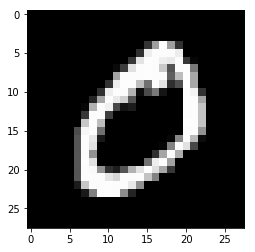

error: D:\Build\OpenCV\opencv-3.3.0\modules\imgproc\src\imgwarp.cpp:3484: error: (-215) dsize.area() > 0 || (inv_scale_x > 0 && inv_scale_y > 0) in function cv::resize


In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(type(x_train))
x_zo = []
y_zo = []
for i in range(len(y_train)):
    if y_train[i] == 0 or y_train[i] == 1:
        x_zo.append(x_train[i])
        y_zo.append(y_train[i])
print(len(y_zo))
xt_zo = []
yt_zo = []

for i in range(len(y_test)):
    if y_test[i] == 0 or y_test[i] == 1:
        xt_zo.append(x_test[i])
        yt_zo.append(y_test[i])
print(len(yt_zo))
x_zo = np.array(x_zo)
y_zo = np.array(y_zo)
xt_zo = np.array(xt_zo)
yt_zo = np.array(yt_zo)


img = x_zo[0:1]
img = np.array(img, dtype='float')
pixels = img.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()


import cv2
#import numpy as np

res = cv2.resize(img, dsize=(0, 0), interpolation=cv2.INTER_CUBIC)
print(img.shape,res.shape)
res = np.array(res, dtype='float')
plt.imshow(res, cmap='gray')
plt.show()


In [46]:

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

if K.image_data_format() == 'channels_first':
    x_zo = x_zo.reshape(x_zo.shape[0], 1, img_rows, img_cols)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_zo = x_zo.reshape(x_zo.shape[0], img_rows, img_cols, 1)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
batch_size = 128
num_classes = 3
epochs = 12
x_train = x_zo.astype('float32')
x_test = xt_zo.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_zo, num_classes )
y_test =  keras.utils.to_categorical(yt_zo, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name = "inputLayer"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (18623, 28, 28, 1)
18623 train samples
3147 test samples
Epoch 1/12
18623/18623 [==============================] - 22s 1ms/step - loss: 0.0901 - acc: 0.9712
Epoch 2/12
18623/18623 [==============================] - 21s 1ms/step - loss: 0.0290 - acc: 0.9910
Epoch 3/12
18623/18623 [==============================] - 21s 1ms/step - loss: 0.0183 - acc: 0.9937
Epoch 4/12
18623/18623 [==============================] - 21s 1ms/step - loss: 0.0137 - acc: 0.9957
Epoch 5/12
18623/18623 [==============================] - 21s 1ms/step - loss: 0.0119 - acc: 0.9963
Epoch 6/12
18623/18623 [==============================] - 21s 1ms/step - loss: 0.0086 - acc: 0.9974
Epoch 7/12
18623/18623 [==============================] - 21s 1ms/step - loss: 0.0071 - acc: 0.9980
Epoch 8/12
18623/18623 [==============================] - 22s 1ms/step - loss: 0.0042 - acc: 0.9992
Epoch 9/12
18623/18623 [==============================] - 21s 1ms/step - loss: 0.0036 - acc: 0.9992
Epoch 10/12
18623/18623 [===

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_6 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 387       
Total params: 2,769,731
Trainable params: 2,769,731
Non-trainable params: 0
_________________________________________________________________


In [27]:
res = model.predict(x_test[0:1])
print(res, y_test[0:1])

[[  4.03460772e-11   6.47250289e-08   7.70556808e-01]] [[ 0.  0.  1.]]


In [28]:
model.layers

In [35]:
w1, b1 = model.layers[0].get_weights()
#w2, b2 = model.layers[1].get_weights()
w2, b2 = model.layers[2].get_weights()
w3, b3 = model.layers[3].get_weights()

In [36]:
print(w1.shape)
print(w2.shape)
print(w3.shape)

(3, 3, 1, 32)
(21632, 128)
(128, 3)


In [55]:
print(w1.shape, b1.shape)
W1=np.vstack([w1,b1]) 
X = x_test[0:1]
xt= np.hstack([x_train,np.zeros(x_train.shape[0]).reshape(x_train.shape[0],1)]) #add extra column for bias
print(xt)
xt[:,-1]=1 #add placeholder as 1

X1 = np.dot(xt,W1) 
X1

(3, 3, 1, 32) (32,)


ValueError: all the input arrays must have same number of dimensions

In [54]:
from keras.datasets import mnist
import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from matplotlib import pyplot as plt

comptime=time.time()
with tf.device('/cpu:0'):
    tf.placeholder(tf.float32, shape=(None, 20, 64))

    seed = 7
    np.random.seed(seed)
    m = Sequential()
    (x_train, _), (x_test, _) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    priorShape_x_train=x_train.shape #prior shape of training set
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_train_shaped=x_train
    m.add(Dense(32, input_dim=784, init='uniform', activation='relu'))
    m.add(Dense(784, init='uniform', activation='sigmoid'))
    m.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    m.fit(x_train[1:2500], x_train[1:2500], nb_epoch=10)

#proper keras prediction
prediction_real=m.predict(x_train[57:58])
prediction_real=prediction_real.reshape((28,28))

#manual weight prediction attempt
x_train=np.hstack([x_train,np.zeros(x_train.shape[0]).reshape(x_train.shape[0],1)]) #add extra column for bias
x_train[:,-1]=1 #add placeholder as 1
'''
weights=np.vstack([model.get_weights()[0],model.get_weights()[1]]) #add trained weights as extra row vector
prediction=np.dot(x_train,weights) #now take dot product.. repeat pattern for next layer
prediction=np.hstack([prediction,np.zeros(prediction.shape[0]).reshape(prediction.shape[0],1)])
prediction[:,-1]=1
weights=np.vstack([model.get_weights()[2],model.get_weights()[3]])
prediction=np.dot(prediction,weights)
prediction=prediction.reshape(priorShape_x_train)
'''
from scipy.stats import logistic
wd, bd = m.get_weights()[0],m.get_weights()[1]

print(wd.shape, bd.shape)
weights=np.vstack([wd,bd]) 
prediction=np.dot(x_train,weights) 

prediction[prediction<0]=0              ### RELU after 1st layer

prediction=np.hstack([prediction,np.zeros(prediction.shape[0]).reshape(prediction.shape[0],1)])
prediction[:,-1]=1
weights=np.vstack([m.get_weights()[2],m.get_weights()[3]])
prediction=np.dot(prediction,weights)

prediction=logistic.cdf(prediction)     ### Sigmoid after 2nd layer

prediction=prediction.reshape(priorShape_x_train)


plt.imshow(prediction[57], interpolation='nearest',cmap='gray')
plt.savefig('myprediction.png') #my prediction, not accurate
plt.imshow(prediction_real,interpolation='nearest',cmap='gray')
plt.savefig('realprediction.png') #in-built keras method, accurate

C:\Users\johir\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=784, activation="relu", kernel_initializer="uniform")`
C:\Users\johir\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, activation="sigmoid", kernel_initializer="uniform")`
C:\Users\johir\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
2499/2499 [==============================] - 1s 500us/step - loss: 0.5473 - acc: 0.6669
Epoch 2/10
2499/2499 [==============================] - 0s 163us/step - loss: 0.2850 - acc: 0.7923
Epoch 3/10
2499/2499 [==============================] - 0s 185us/step - loss: 0.2741 - acc: 0.7936
Epoch 4/10
2499/2499 [==============================] - 0s 188us/step - loss: 0.2705 - acc: 0.7932
Epoch 5/10
2499/2499 [==============================] - 1s 200us/step - loss: 0.2670 - acc: 0.7941
Epoch 6/10
2499/2499 [==============================] - 0s 179us/step - loss: 0.2626 - acc: 0.7950
Epoch 7/10
2499/2499 [==============================] - 0s 158us/step - loss: 0.2566 - acc: 0.7971
Epoch 8/10
2499/2499 [==============================] - 0s 151us/step - loss: 0.2492 - acc: 0.7972
Epoch 9/10
2499/2499 [==============================] - 0s 160us/step - loss: 0.2414 - acc: 0.7960
Epoch 10/10
2499/2499 [==============================] - 0s 169us/step - loss: 0.2345 - acc: 0.7963
(784, 32)

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_20 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [31]:
X = x_test[0:1]
X.shape

(1, 28, 28, 1)

In [174]:
X1 = np.multiply(w1,X)
len(X1[0])

ValueError: operands could not be broadcast together with shapes (3,3,1,32) (1,28,28,1) 

In [105]:
W = model.get_weights()
w,b = model.layers[0].get_weights()
print(len(b),len(model.layers))
w[0][0]

32 5


array([[ 0.22453645,  0.04581326,  0.1861829 , -0.16040848,  0.19114304,
        -0.06762332, -0.03503918, -0.05004219,  0.11370496,  0.17326893,
         0.18846688, -0.10725031,  0.12068876,  0.09081738, -0.09744596,
        -0.06893009, -0.11200488, -0.12226102, -0.0814598 ,  0.09370626,
        -0.1578477 ,  0.03763894, -0.1038045 ,  0.15188017,  0.04330318,
        -0.0486319 ,  0.04487037,  0.02240774, -0.0412462 ,  0.08530463,
        -0.01649054, -0.05160175]], dtype=float32)

In [102]:
W = model.get_weights()
w,b = model.layers[1].get_weights()
print(len(b))
len(w[1][0][0])

64


64

In [79]:
import pygraphviz as pgv
import itertools
print(len(W[0]))
d={'1': {'2': None,'6': None}, '2': {'1': None, '3': None}, '3': {'2': None}}
d = dict(itertools.zip_longest(*[iter(W)] * 2, fillvalue=""))
G = pgv.AGraph(d)
dotfile = "file.dot"
imfile = "file.png"
G.write(dotfile)
G.layout(prog = 'dot')
G.draw(imfile)

3


TypeError: unhashable type: 'numpy.ndarray'

Populating the interactive namespace from numpy and matplotlib


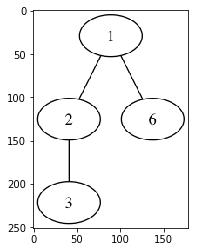

In [58]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(imfile)
imgplot = plt.imshow(img)
plt.show()

In [7]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [2]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf
if K.image_data_format() == 'channels_first':
    x_zo = x_zo.reshape(x_zo.shape[0], 1, img_rows, img_cols)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_zo = x_zo.reshape(x_zo.shape[0], img_rows, img_cols, 1)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_zo.astype('float32')
x_test = xt_zo.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_zo.shape,x_train.shape[0], 'train samples', y_zo.shape)
print(x_test.shape[0], 'test samples')

#y_train = keras.utils.to_categorical(y_zo, 3 )
#y_test =  keras.utils.to_categorical(yt_zo, 3)

print(y_zo.shape,y_train.shape)
nm = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,1), name = "Input"),
    keras.layers.Dense(128, activation=tf.nn.relu ,name = "H"),
    keras.layers.Dense(2, activation=tf.nn.softmax, name = "output")
])

nm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

nm.fit(x_zo, y_zo, epochs=10)

x_train shape: (12665, 28, 28, 1)
(12665, 28, 28, 1) 12665 train samples (12665,)
2115 test samples
(12665,) (60000,)
Epoch 1/10
12665/12665 [==============================] - 2s 131us/step - loss: 0.1336 - acc: 0.9910
Epoch 2/10
12665/12665 [==============================] - 1s 92us/step - loss: 0.0832 - acc: 0.9947
Epoch 3/10
12665/12665 [==============================] - 1s 85us/step - loss: 0.0832 - acc: 0.9947
Epoch 4/10
12665/12665 [==============================] - 1s 87us/step - loss: 0.0904 - acc: 0.9942
Epoch 5/10
12665/12665 [==============================] - 1s 86us/step - loss: 0.0433 - acc: 0.9973
Epoch 6/10
12665/12665 [==============================] - 1s 95us/step - loss: 0.0407 - acc: 0.9975
Epoch 7/10
12665/12665 [==============================] - 1s 93us/step - loss: 0.0407 - acc: 0.9975
Epoch 8/10
12665/12665 [==============================] - 1s 101us/step - loss: 0.0407 - acc: 0.9975
Epoch 9/10
12665/12665 [==============================] - 1s 100us/step - loss: 

In [3]:
loss , acc = nm.evaluate(xt_zo, yt_zo)
print(acc)

2115/2115 [==============================] - 0s 59us/step
0.998581560284


In [4]:
start = 0
end = 1
X = xt_zo[start:end]
res = nm.predict(X)
print(res, yt_zo[start:end])

[[ 0.  1.]] [1]


In [5]:
nm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
H (Dense)                    (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 2)                 258       
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________


In [6]:
w1,b1 = nm.layers[1].get_weights()
w2,b2 = nm.layers[2].get_weights()
print(w1.shape,b1.shape, w2.shape, b2.shape)

(784, 128) (128,) (128, 2) (2,)


In [7]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

W1 = np.vstack([w1])
x = xt_zo[0:1]
y = yt_zo[0:1]
X = x.reshape(784,)
#X[:, -1] = 1
X1 = np.dot(X,W1)
X1 = np.add(X1, b1)
X1[X1<0]=0
print(X1.shape)
W2 = np.vstack([w2])
X2 = np.dot(X1,W2)
X2 = np.add(X2,b2)
X2 = softmax(X2)
print(X2, y,nm.predict(x))

(128,)
[ 0.  1.] [1] [[ 0.  1.]]


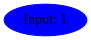

In [8]:
from graphviz import Graph,Digraph

dot = Graph(format='pdf')
color = ["red","green"]
dot.node('I',"Input: "+str(y[0]),color = "blue",style = "filled",**{'width':str(.2), 'height':str(.2)})
dot

In [9]:
for i in range(X.shape[0]):
    if X[i] > 0:
        dot.node('x_'+str(i), str(X[i]), color = color[1], style  = "filled",**{'width':str(.2), 'height':str(.2)})
    else :
         dot.node('x_'+str(i), str(X[i]), color = color[0], style  = "filled",**{'width':str(.2), 'height':str(.2)})
#dot.render('network.gv', view=True)

dot

In [10]:
#for j in range(X.shape[0]):
#        dot.edge('I','x_'+str(j))

E = []
for j in range(X.shape[0]):
        E.append(('I','x_'+str(j)))
dot.edges(E)
dot

In [11]:
for i in range(X1.shape[0]):
    if X1[i] > 0:
        dot.node('x1_'+str(i), str(X1[i]), color = color[1], style  = "filled",**{'width':str(.2), 'height':str(.2)})
    else :
         dot.node('x1_'+str(i), str(X1[i]), color = color[0], style  = "filled",**{'width':str(.2), 'height':str(.2)})

dot           

In [19]:
E1 = []
total = 0
for j in range(X1.shape[0]):
    for i in range(X.shape[0]):
        total += 1
        #if X[i] > 0:
        E1.append(('x_'+str(i),'x1_'+str(j)))
# Adding edges
print(len(E1),total,100*len(E1)/total)
#dot.edges(E1)
#dot

100352 100352 100.0


In [20]:
dot.edges(E1)

In [21]:
for i in range(X2.shape[0]):
    if X2[i] > 0:
        dot.node('x2_'+str(i), str(X2[i]), color = color[1], style  = "filled")
    else :
         dot.node('x2_'+str(i), str(X2[i]), color = color[0], style  = "filled")
# Printing DOT

#dot

In [22]:
E2 = []
total = 0
for j in range(X2.shape[0]):
    for i in range(X1.shape[0]):
        total += 1
        #if X1[i] > 0:
        E2.append(('x1_'+str(i),'x2_'+str(j)))
print(len(E2), total, 100*len(E2)/total)
dot.edges(E2)
#dot

256 256 100.0


In [16]:
#print(dot.source)
from graphviz import render
render("dot", "png",'C:/Users/johir/Desktop/mlpl/NetworkSlice/dig1')

'C:/Users/johir/Desktop/mlpl/NetworkSlice/dig1.png'

In [ ]:
dot